In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import linalg
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [6]:
def dataset_gen():
    """Generate 2 Gaussians samples with different covariance matrices"""
    # Define size and dimension. 
    n, dim = 600, 2
    # Set mean vector for class 0. 
    m_0 = np.array([0, 0]).reshape(2, 1)
    # Set mean vector for class 1.
    m_1 = np.array([9, 8]).reshape(2, 1)
    # Set covariance matrix for class 0. 
    C_0 = np.array([[6, 4],
                    [4, 9]])
    # Set covariance matrix for class 1. 
    C_1 = np.array([[8, -3],
                    [-3, 4]])
    # Generate multivariate_normal for class 0.
    X_0 = np.random.multivariate_normal(mean=m_0.reshape(dim,), cov=C_0, size=n//2)
    # Generate multivariate_normal for class 1.
    X_1 = np.random.multivariate_normal(mean=m_1.reshape(dim,), cov=C_1, size=n//2)
    # Join both classes 
    X = np.concatenate((X_0, X_1), axis=0)
    # Generate appropriate class labels
    # hstack and concatenate do the same thing for this senario
    y = np.hstack((np.zeros(n//2), np.ones(n//2)))
    return X, y


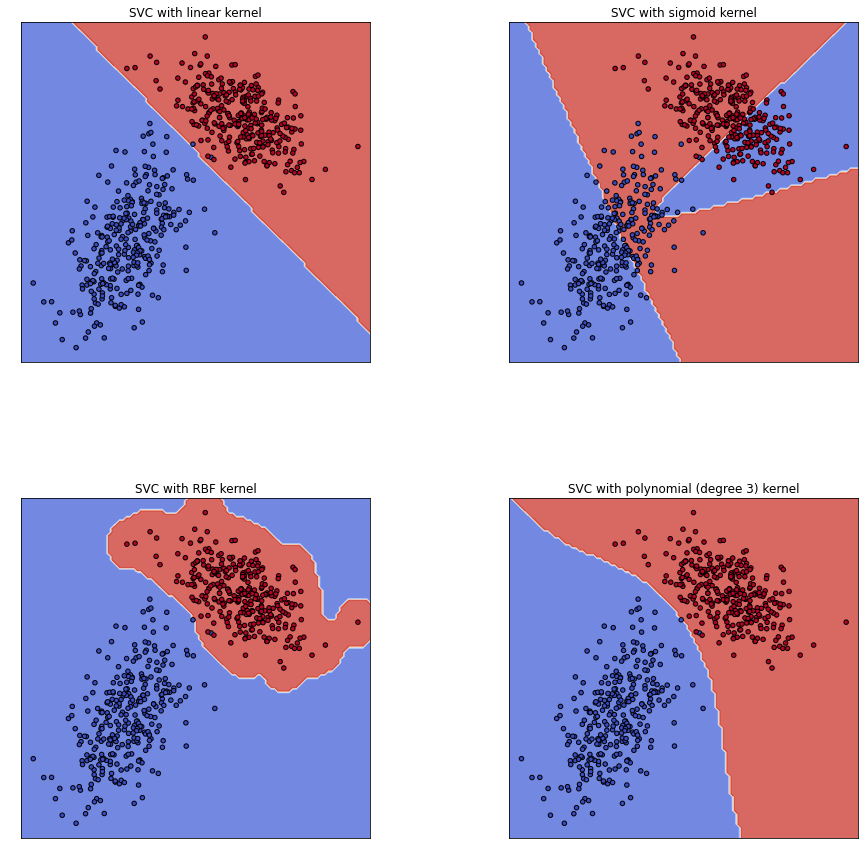

In [16]:
# Take the selected two features. 
X,y = dataset_gen()

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="sigmoid", C=C,gamma="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models_fits = (clf.fit(X, y) for clf in models)
# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with sigmoid kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models_fits, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=" ",
        ylabel=" ",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
